Ce code a pour but d'identifier les rapports $\frac{E}{(1-\nu^2)}$ pour chaque plaque, à partir des analyses modales. Nous testerons pour chacune avec un encastrement et un appuis simple.

Pour vérifier la "validité" entre AS et encastrement, on dispose des modules d'Young de constructeurs pour certaines plaques qui donnent un ordre de grandeur. En effet, si le rapport $\frac{E}{(1-\nu^2)}$ implique $\nu >> 0.5$ pour avoir $E$ de l'ordre de grandeur des constructeurs, c'est surement qu'il y a un problème dans le modèle théorique.

Dans un second temps, le code exporte un dictionnaire pour chaque plaque, contenant les paramètres utiles au modèle : $\rho$, $\frac{E}{(1-\nu^2)}$, $L_x, L_y, h$, 

In [51]:
E_construc = {
    "matériaux" : ["Polypropylène", "MDF", "Duralumin-Alu"],
    "rho (kg/m3)" : [900, 780, 2670],
    "E (GPa)" : [1.1, 2.7, 70],
    "url" : ["https://fr.wikipedia.org/wiki/Polypropyl%C3%A8ne", "https://www.bigmat.fr/wp-content/uploads/2018/03/ftcaracteristiques_kronodium_mdf_2010v1.pdf", "https://www.metallservice.ch/msm/msm-home/services/infos-t%C3%A9l%C3%A9chargement/infos-produits-fiches-techniques/plaques-d'aluminium/fiche-technique-pour-plaques-en-aluminium-en-aw-5754-nq.pdf ; https://lugand-aciers.fr/la5083-cp-alliage-daluminium/"]
}
import pandas as pd
print("Propriétés physiques des matériaux par les constructeurs")
pd.DataFrame(E_construc)

Propriétés physiques des matériaux par les constructeurs


,matériaux,rho (kg/m3),E (GPa),url
0,Polypropylène,900,1.1,https://fr.wikipedia.org/wiki/Polypropyl%C3%A8ne
1,MDF,780,2.7,https://www.bigmat.fr/wp-content/uploads/2018/...
2,Duralumin-Alu,2670,70.0,https://www.metallservice.ch/msm/msm-home/serv...


In [52]:
import pickle

with open('modal_plexi.pkl', 'rb') as f:
    modal_analysis_plexi = pickle.load(f)

with open('modal_m2.pkl', 'rb') as f:
    modal_analysis_m2 = pickle.load(f)

with open('modal_m1.pkl', 'rb') as f:
    modal_analysis_m1 = pickle.load(f)

with open('modal_metal.pkl', 'rb') as f:
    modal_analysis_metal = pickle.load(f)

In [71]:
import sys
sys.path.append("../")
from vico_modphy.guitare_config import *

NmB_idx[:,0]

array([1., 1.])

In [63]:
import numpy as np

def Enu_AS (mode_idx, Lx, Ly, h, rho, modal_analysis) :
    n, m = NmB_idx[:,mode_idx]
    fnm = modal_analysis_metal["freq"][mode_idx]
    Anm = ((n**2*Ly**2 + m**2*Lx**2)/(Lx**2*Ly**2))**2
    I = h**2*np.pi**4/12/rho
    Enu = (2*np.pi*fnm)**2/I/Anm
    return Enu

In [70]:
#Metal (qui est enfait un alliage aluminium-duralumin)
Lx=395e-3
Ly=255e-3
h=6.01e-3
rho=1588e-3/Lx/Ly/h
print(f"Masse volumique : {rho:.1f} (kg/m3)")

E = E_construc["E (GPa)"][2]*1e9
print(f"E constructeur : {E*1e-9} (GPa)")

Enu_AS_0 = Enu_AS(0, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_metal)
Enu_AS_1 = Enu_AS(1, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_metal)
Enu_AS_2 = Enu_AS(2, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_metal)

print("================================================\nPour un appuis simple :\n")

print("E/(1-nu^2) calculé sur f11, f21, f12 :", Enu_AS_0, Enu_AS_1, Enu_AS_2)
print("E/(1-nu^2) moyenné sur les 2 premiers :", np.mean([Enu_AS_0, Enu_AS_1]))
# print(E/Enu_AS_0)
nu_cons0 = np.sqrt(1-E/Enu_AS_0)
nu_cons1 = np.sqrt(1-E/Enu_AS_1)
print("nu sachant E constructeur :", nu_cons0, nu_cons1)

Masse volumique : 2623.2 (kg/m3)
E constructeur : 70.0 (GPa)
Pour un appuis simple :

E/(1-nu^2) calculé sur f11, f21, f12 : 22268531070.80035 24990271594.501747 10938757407.662296
E/(1-nu^2) moyenné sur les 2 premiers : 23629401332.651047
nu sachant E constructeur : nan nan


/var/folders/9z/kzhjdk9j47z0026s88r_0ssh0000gn/T/ipykernel_91736/853518350.py:20: RuntimeWarning: invalid value encountered in sqrt
  nu_cons0 = np.sqrt(1-E/Enu_AS_0)
/var/folders/9z/kzhjdk9j47z0026s88r_0ssh0000gn/T/ipykernel_91736/853518350.py:21: RuntimeWarning: invalid value encountered in sqrt
  nu_cons1 = np.sqrt(1-E/Enu_AS_1)


In [66]:
#Polypropylène
Lx=400e-3
Ly=260e-3
h=4.51e-3
rho=382e-3/Lx/Ly/h
print(f"Masse volumique : {rho:.1f} (kg/m3)")

E = E_construc["E (GPa)"][0]*1e9
print(f"E constructeur : {E*1e-9} (GPa)")

Enu_AS_0 = Enu_AS(0, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_plexi)
Enu_AS_1 = Enu_AS(1, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_plexi)
Enu_AS_2 = Enu_AS(2, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_plexi)

print("================================================\nPour un appuis simple :\n")

print("E/(1-nu^2) calculé sur f11, f21, f12 :", Enu_AS_0, Enu_AS_1, Enu_AS_2)
print("E/(1-nu^2) moyenné sur les 2 premiers :", np.mean([Enu_AS_0, Enu_AS_1]))
nu_cons0 = np.sqrt(1-E/Enu_AS_0)
nu_cons1 = np.sqrt(1-E/Enu_AS_1)
print("nu sachant E constructeur :", nu_cons0, nu_cons1)

Masse volumique : 814.4 (kg/m3)
E constructeur : 1.1 (GPa)
Pour un appuis simple :

E/(1-nu^2) calculé sur f11, f21, f12 : 13162031867.728558 14637567540.149456 6501045391.293302
E/(1-nu^2) moyenné sur les 2 premiers : 13899799703.939007
nu sachant E constructeur : 0.9573015603312286 0.9616916875137549


In [67]:
#MDF2
Lx=400e-3
Ly=260e-3
h=6.04e-3
rho=507e-3/Lx/Ly/h
print(f"Masse volumique : {rho:.1f} (kg/m3)")

E = E_construc["E (GPa)"][1]*1e9
print(f"E constructeur : {E*1e-9} (GPa)")

Enu_AS_0 = Enu_AS(0, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m2)
Enu_AS_1 = Enu_AS(1, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m2)
Enu_AS_2 = Enu_AS(2, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m2)

print("================================================\nPour un appuis simple :\n")

print("E/(1-nu^2) calculé sur f11, f21, f12 :", Enu_AS_0, Enu_AS_1, Enu_AS_2)
print("E/(1-nu^2) moyenné sur les 2 premiers :", np.mean([Enu_AS_0, Enu_AS_1]))
nu_cons0 = np.sqrt(1-E/Enu_AS_0)
nu_cons1 = np.sqrt(1-E/Enu_AS_1)
print("nu sachant E constructeur :", nu_cons0, nu_cons1)

Masse volumique : 807.1 (kg/m3)
E constructeur : 2.7 (GPa)
Pour un appuis simple :

E/(1-nu^2) calculé sur f11, f21, f12 : 7272543777.119565 8087835662.158468 3592084997.236915
E/(1-nu^2) moyenné sur les 2 premiers : 7680189719.639017
nu sachant E constructeur : 0.7929316697460834 0.8161895145921698


In [78]:
#MDF1
Lx=400e-3
Ly=259e-3
h=2.95e-3
rho=236e-3/Lx/Ly/h
print(f"Masse volumique : {rho:.1f} (kg/m3)")

E = E_construc["E (GPa)"][1]*1e9
print(f"E constructeur : {E*1e-9} (GPa)")

Enu_AS_0 = Enu_AS(0, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m1)
Enu_AS_1 = Enu_AS(1, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m1)
Enu_AS_2 = Enu_AS(2, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m1)

print("================================================\nPour un appuis simple :\n")

print("E/(1-nu^2) calculé sur f11, f21, f12 :", Enu_AS_0, Enu_AS_1, Enu_AS_2)
print("E/(1-nu^2) moyenné sur les 2 premiers :", np.mean([Enu_AS_0, Enu_AS_1]))
nu_cons0 = np.sqrt(1-E/Enu_AS_0)
nu_cons1 = np.sqrt(1-E/Enu_AS_1)
print("nu sachant E constructeur :", nu_cons0, nu_cons1)

Masse volumique : 782.1 (kg/m3)
E constructeur : 2.7 (GPa)
Pour un appuis simple :

E/(1-nu^2) calculé sur f11, f21, f12 : 28423490555.409748 31887115727.286343 13964948364.841461
E/(1-nu^2) moyenné sur les 2 premiers : 30155303141.348045
nu sachant E constructeur : 0.951319162157048 0.9567268691874775


# Etude de l'influence des dimensions de la plaque pour approcher les valeurs constructeurs

In [123]:
#Testons de faire varier Lx, Ly pour obtenir de meilleures valeures de nu
Lx=400e-3
Ly=259e-3
h=2.95e-3
rho=236e-3/Lx/Ly/h

E = E_construc["E (GPa)"][1]*1e9
print(rho,E*1e-9)

delta = 100e-3
deltah = 1e-3
Lxs = np.linspace(Lx-delta, Lx)
Lys = np.linspace(Ly-delta, Ly)
hs = np.linspace(h, h+deltah, 5)

nus = np.zeros((len(Lxs),len(Lys), len(hs)))
for i in range(len(Lxs)) :
    for j in range(len(Lys)) :
        for k in range(len(hs)) :
            Enu_AS_0 = Enu_AS(0, Lxs[i], Lys[j], hs[k], rho ,  modal_analysis=modal_analysis_m1)
            nu_cons0 = np.sqrt(1-E/Enu_AS_0)
            nus[i,j,k] = nu_cons0

772.2007722007722 2.7


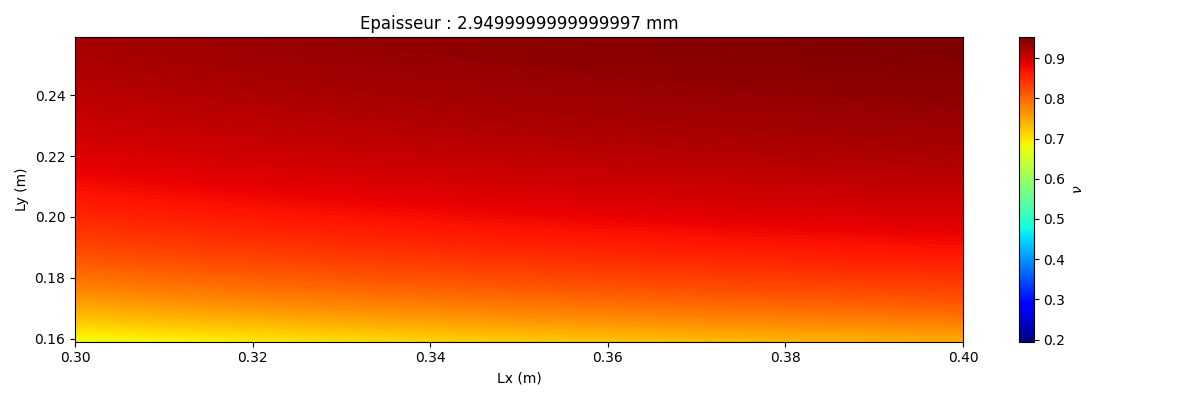

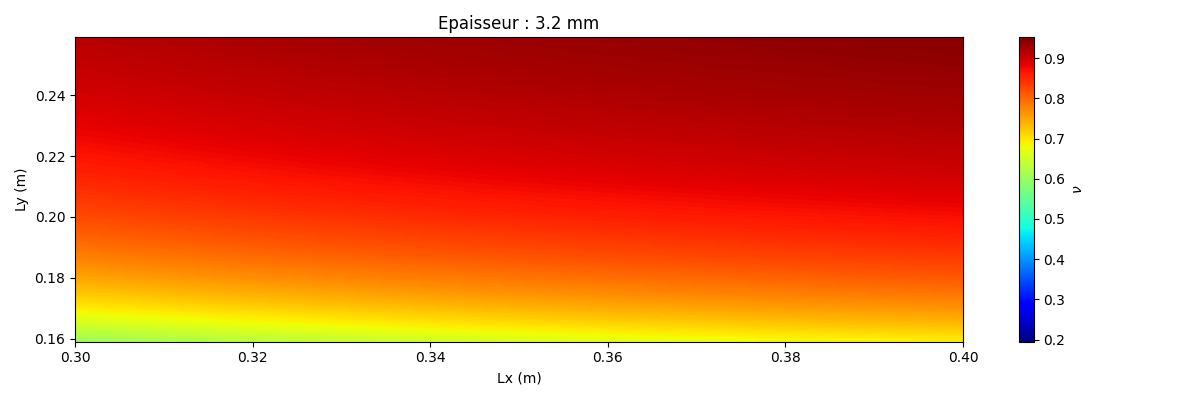

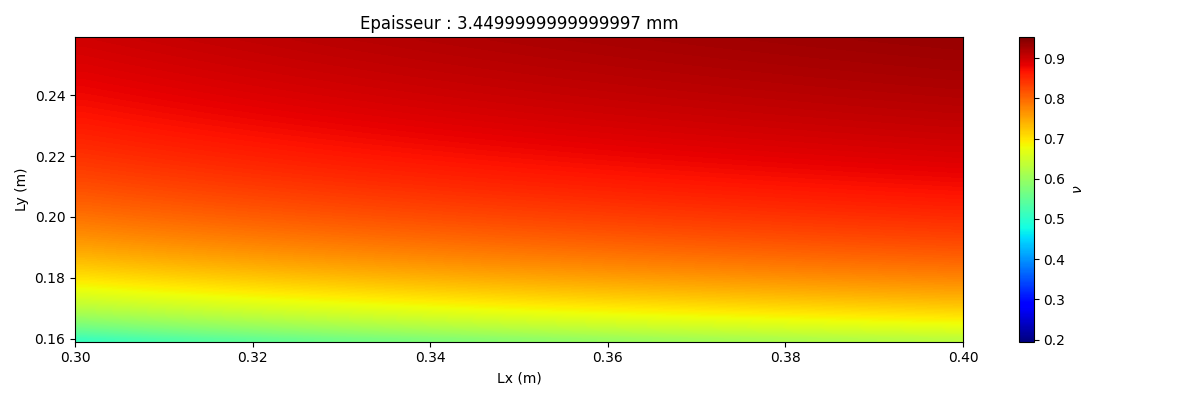

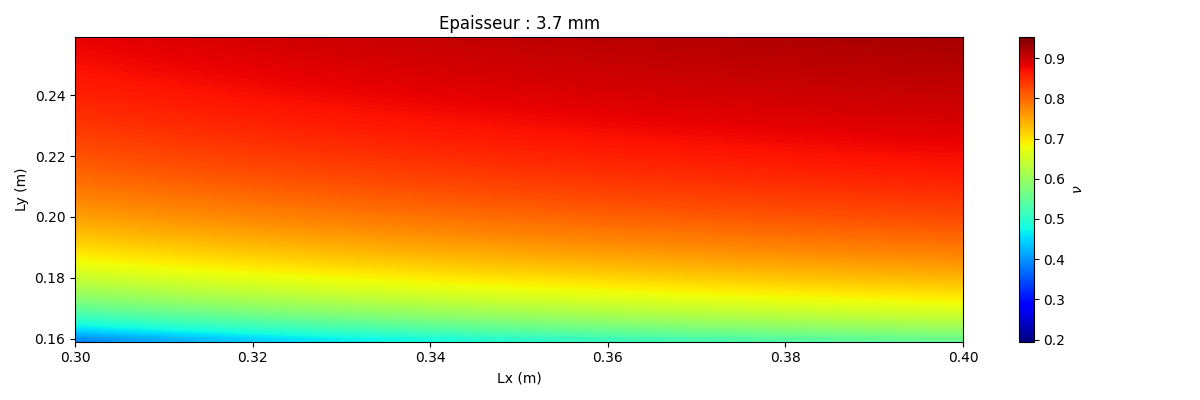

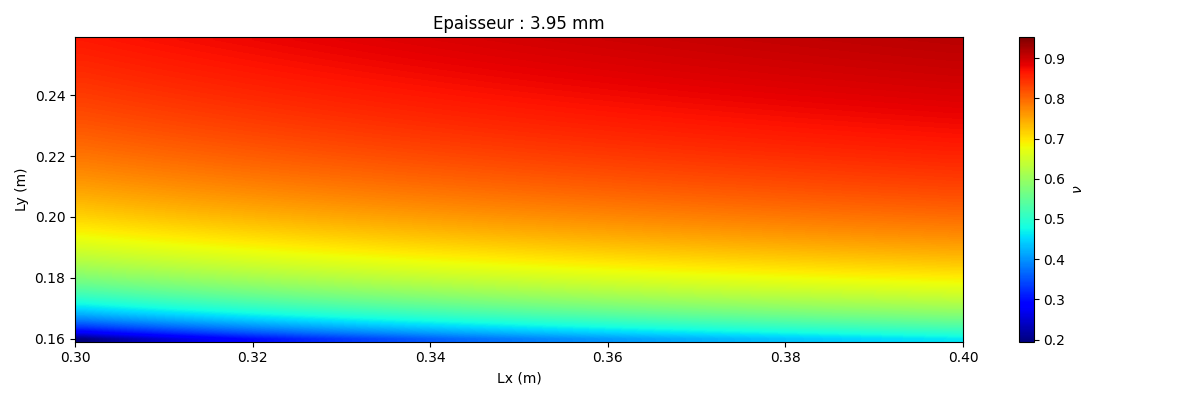

In [135]:
import matplotlib.pyplot as plt

%matplotlib widget
plt.rcParams["figure.figsize"] = (12,4)


for k in range(len(hs)) :
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    img = ax1.imshow(nus[:,:,k].T,
        extent=[Lxs[0], Lxs[-1] , Lys[0], Lys[-1]] ,
        cmap="jet" ,
        interpolation = "bilinear",
        aspect="auto" ,
        origin="lower")

    cbar = fig.colorbar(img,ax=ax1)
    img.set_clim(np.min(nus), np.max(nus))
    cbar.set_label(r"$\nu$")
    ax1.set_ylabel("Ly (m)")
    ax1.set_xlabel(r"Lx (m)")
    ax1.set_title(fr"Epaisseur : {hs[k]*1e3} mm")

    fig.tight_layout()

    plt.show()

**Rappel :** ces courbes sont pour le medium 1

On voit alors que pour matcher avec des valeurs de $\nu$ habituelles (de l'ordre de 0.3,0.5) tout en restant sur une hypothèse d'appuis simple, il faut conséquemment modifier les dimensions de notre plaque.

Ainsi, on retiens que si notre plaque est mise théoriquement avec une épaisseur de 3.7, une plaque de dimension Lx,Ly = 30cm, 16cm serait plus adaptée. Ou alors, si l'on a une épaisseur de 3.95mm, on a plus de liberté sur le dimensionnement de la plaque.

In [164]:
eps = 3e-3
p = np.argwhere(np.abs(nus-0.3) < eps)[0]
Lxs[p[0]], Lys[p[1]], hs[p[-1]], nus[p[0],p[1],p[-1]]

(0.3061224489795919, 0.1610408163265306, 0.00395, 0.30271658528000406)

Désormais, on peut alors regarder avec ces modifications de dimensionnement si les rapports de fréquences sont plus adaptés par rapport à la réponse de table mesurée.

In [169]:
Lx, Ly, h = Lxs[p[0]], Lys[p[1]], hs[p[-1]]
nu = nus[p[0],p[1],p[-1]]

def fnm_f11_AS(n,m, Lx, Ly) :
    num = n**2 + (Lx/Ly*m)**2
    den = 1 + (Lx/Ly)**2
    return num/den

rapports_AS = []
for i in range(5) :
    n, m = NmB_idx[:,i]
    rapport_i = fnm_f11_AS(n,m, Lx, Ly)
    rapports_AS.append(rapport_i)
rapports_AS.sort()
rapports_AS

[1.0, 1.6502768160148054, 3.349723183985195, 4.0, 7.265928490627188]

In [170]:
pd.DataFrame(modal_analysis_m1).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
table,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1
freq,75,149,160,184,268,286,319,345,427,460,515,602,654
xi,-0.00026,-0.000179,-0.000337,-0.000808,-0.000549,-0.000603,-0.000752,-0.000908,-0.000219,-0.000758,-0.001235,-0.001077,-0.000958
ratios,1.0,1.986667,2.133333,2.453333,3.573333,3.813333,4.253333,4.6,5.693333,6.133333,6.866667,8.026667,8.72
xi_mod,-0.088747,-0.030742,-0.05392,-0.112417,-0.052442,-0.053975,-0.060349,-0.067376,-0.01313,-0.042184,-0.06139,-0.045799,-0.0375


In [171]:
## Calcul des modes
def omega_pq (p,q) :    #Calcul analytique des pulsations propres d'une plaque en appuis simple
    return np.sqrt(E*h**2/(12*rho*(1-nu**2))) * ((p*np.pi/Lx)**2+(q*np.pi/Ly)**2)

wnB = np.zeros(9)
NmB_idx = np.zeros((2,9))   #Cette liste permet de remonter du mode contracté "i" au mode réel (n_i,m_i) en appelant NmB_idx[:,i]
j = 0
for n in range(1,3+1) :
    for m in range(1,3+1) :
        wnB[j] = omega_pq(n,m)
        NmB_idx[0,j] = n
        NmB_idx[1,j] = m
        j += 1

### Tri par ordre de fréquences croissantes
tri_idx = np.argsort(wnB)

wnB = wnB[tri_idx]    #On range les pulsations par ordre croissant
fnB = wnB/(2*np.pi)

In [181]:
fnB

array([ 173.        ,  285.49788917,  472.99437112,  579.50211083,
        692.        ,  879.49648195, 1257.00562888, 1369.50351805,
       1557.        ])

In [174]:
np.array(rapports_AS)*75

array([ 75.       , 123.7707612, 251.2292388, 300.       , 544.9446368])

Bizarre : on devrait logiquement retrouver au moins le premier mode!!!

# Encastrement

In [206]:
Nmx = 7
Nmy = 7

Gx_Nmx = np.arange(2,Nmx+2)-1/2
Gx_Nmx[0] = 1.506

Hx_Nmx = (np.arange(2,Nmx+2)-1/2)**2*(1-2/((np.arange(2,Nmx+2)-1/2)*np.pi))
Hx_Nmx[0] = 1.248

Jx_Nmx = Hx_Nmx

Gy_Nmy = np.arange(2,Nmy+2)-1/2
Gy_Nmy[0] = 1.506

Hy_Nmy = (np.arange(2,Nmy+2)-1/2)**2*(1-2/((np.arange(2,Nmy+2)-1/2)*np.pi))
Hy_Nmy[0] = 1.248

Jy_Nmy = Hy_Nmy

In [197]:
D = E*h**3/(12*(1-nu**2))
#Formule de l'article qui ne va pas pour l'appuis simple : 
w2_Nmx_Nmy = np.pi**4*D/(Lx**4*rho*h) * (Gx_Nmx[:,np.newaxis]**4 + Gy_Nmy[np.newaxis,:]**4*(Lx/Ly)**4 + 2*(Lx/Ly)**2 * (nu*Hx_Nmx[:,np.newaxis]*Hy_Nmy[np.newaxis,:] + (1-nu)*Jx_Nmx[:,np.newaxis]*Jy_Nmy[np.newaxis,:]))
# Formule corrigée pour retomber sur ces pattes lors d'un AS, mais jsp si ca convient pr un encastré
# w2_Nmx_Nmy = np.pi**4*D/(Lx**2*rho*h) * (Gx_Nmx[:,np.newaxis]**4 + Gy_Nmy[np.newaxis,:]**4*(Lx/Ly)**4 + 2*(Lx/Ly)**2 * (nu*Hx_Nmx[:,np.newaxis]*Hy_Nmy[np.newaxis,:] + (1-nu)*Jx_Nmx[:,np.newaxis]*Jy_Nmy[np.newaxis,:]))
w_Nmx_Nmy = np.sqrt(w2_Nmx_Nmy)
f_Nmx_Nmy = w_Nmx_Nmy/2/np.pi

In [198]:
print(h, nu, E, Lx, Ly, rho)

0.00395 0.30271658528000406 2700000000.0 0.3061224489795919 0.1610408163265306 772.2007722007722


In [199]:
f_NmB = f_Nmx_Nmy.reshape(-1)
p = np.argsort(f_NmB)
f_NmB = f_NmB[p]
f_NmB

array([ 342.79331078,  456.5707481 ,  657.69787607,  885.16640798,
        996.32793615, 1184.34128916, 1699.86771274, 1812.34249303,
       1996.72461865])

In [193]:
f_NmB/f_NmB[0]

array([1.        , 1.33191265, 1.91864268, 2.58221611, 2.9064976 ,
       3.454972  , 4.95887072, 5.28698325, 5.82486459])

In [207]:
def Enu_clamped (mode_idx, Lx, Ly, h, rho, modal_analysis) :
    n, m = NmB_idx[:,mode_idx]
    n,m = int(n), int(m)
    fnm = modal_analysis_metal["freq"][mode_idx]
    Anm = (Gx_Nmx[n]**4 + Gy_Nmy[m]**4*(Lx/Ly)**4 + 2*(Lx/Ly)**2 * Jx_Nmx[n]*Jy_Nmy[m])
    I = h**2*np.pi**2/12/rho
    Enu = (2*np.pi*fnm)**2/Lx**4/I/Anm
    return Enu

In [208]:
#Metal (qui est enfait un alliage aluminium-duralumin)
Lx=395e-3
Ly=255e-3
h=6.01e-3
rho=1588e-3/Lx/Ly/h
print(f"Masse volumique : {rho:.1f} (kg/m3)")

E = E_construc["E (GPa)"][2]*1e9
print(f"E constructeur : {E*1e-9} (GPa)")

Enu_AS_0 = Enu_clamped(0, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_metal)
Enu_AS_1 = Enu_clamped(1, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_metal)
Enu_AS_2 = Enu_clamped(2, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_metal)

print("================================================\nPour un appuis simple :\n")

print("E/(1-nu^2) calculé sur f11, f21, f12 :", Enu_AS_0, Enu_AS_1, Enu_AS_2)
print("E/(1-nu^2) moyenné sur les 2 premiers :", np.mean([Enu_AS_0, Enu_AS_1]))
# print(E/Enu_AS_0)
nu_cons0 = np.sqrt(1-E/Enu_AS_0)
nu_cons1 = np.sqrt(1-E/Enu_AS_1)
print("nu sachant E constructeur :", nu_cons0, nu_cons1)

Masse volumique : 2623.2 (kg/m3)
E constructeur : 70.0 (GPa)
Pour un appuis simple :

E/(1-nu^2) calculé sur f11, f21, f12 : 11642991020384.63 15122609606097.875 7337313314895.2705
E/(1-nu^2) moyenné sur les 2 premiers : 13382800313241.254
nu sachant E constructeur : 0.9969893676432778 0.9976829001612351


In [209]:
#Polypropylène
Lx=400e-3
Ly=260e-3
h=4.51e-3
rho=382e-3/Lx/Ly/h
print(f"Masse volumique : {rho:.1f} (kg/m3)")

E = E_construc["E (GPa)"][0]*1e9
print(f"E constructeur : {E*1e-9} (GPa)")

Enu_AS_0 = Enu_clamped(0, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_plexi)
Enu_AS_1 = Enu_clamped(1, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_plexi)
Enu_AS_2 = Enu_clamped(2, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_plexi)

print("================================================\nPour un appuis simple :\n")

print("E/(1-nu^2) calculé sur f11, f21, f12 :", Enu_AS_0, Enu_AS_1, Enu_AS_2)
print("E/(1-nu^2) moyenné sur les 2 premiers :", np.mean([Enu_AS_0, Enu_AS_1]))
nu_cons0 = np.sqrt(1-E/Enu_AS_0)
nu_cons1 = np.sqrt(1-E/Enu_AS_1)
print("nu sachant E constructeur :", nu_cons0, nu_cons1)

Masse volumique : 814.4 (kg/m3)
E constructeur : 1.1 (GPa)
Pour un appuis simple :

E/(1-nu^2) calculé sur f11, f21, f12 : 6230807723368.518 8118267364311.232 3944354635948.0117
E/(1-nu^2) moyenné sur les 2 premiers : 7174537543839.875
nu sachant E constructeur : 0.9999117250441509 0.99993224925869


In [210]:
#MDF2
Lx=400e-3
Ly=260e-3
h=6.04e-3
rho=507e-3/Lx/Ly/h
print(f"Masse volumique : {rho:.1f} (kg/m3)")

E = E_construc["E (GPa)"][1]*1e9
print(f"E constructeur : {E*1e-9} (GPa)")

Enu_AS_0 = Enu_AS(0, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m2)
Enu_AS_1 = Enu_AS(1, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m2)
Enu_AS_2 = Enu_AS(2, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m2)

print("================================================\nPour un appuis simple :\n")

print("E/(1-nu^2) calculé sur f11, f21, f12 :", Enu_AS_0, Enu_AS_1, Enu_AS_2)
print("E/(1-nu^2) moyenné sur les 2 premiers :", np.mean([Enu_AS_0, Enu_AS_1]))
nu_cons0 = np.sqrt(1-E/Enu_AS_0)
nu_cons1 = np.sqrt(1-E/Enu_AS_1)
print("nu sachant E constructeur :", nu_cons0, nu_cons1)

Masse volumique : 807.1 (kg/m3)
E constructeur : 2.7 (GPa)
Pour un appuis simple :

E/(1-nu^2) calculé sur f11, f21, f12 : 7272543777.119565 2992272870.2732553 791316088.273878
E/(1-nu^2) moyenné sur les 2 premiers : 5132408323.69641
nu sachant E constructeur : 0.7929316697460834 0.31253139811816416


In [211]:
#MDF1
Lx=400e-3
Ly=259e-3
h=2.95e-3
rho=236e-3/Lx/Ly/h
print(f"Masse volumique : {rho:.1f} (kg/m3)")

E = E_construc["E (GPa)"][1]*1e9
print(f"E constructeur : {E*1e-9} (GPa)")

Enu_AS_0 = Enu_AS(0, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m1)
Enu_AS_1 = Enu_AS(1, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m1)
Enu_AS_2 = Enu_AS(2, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m1)

print("================================================\nPour un appuis simple :\n")

print("E/(1-nu^2) calculé sur f11, f21, f12 :", Enu_AS_0, Enu_AS_1, Enu_AS_2)
print("E/(1-nu^2) moyenné sur les 2 premiers :", np.mean([Enu_AS_0, Enu_AS_1]))
nu_cons0 = np.sqrt(1-E/Enu_AS_0)
nu_cons1 = np.sqrt(1-E/Enu_AS_1)
print("nu sachant E constructeur :", nu_cons0, nu_cons1)

Masse volumique : 772.2 (kg/m3)
E constructeur : 2.7 (GPa)
Pour un appuis simple :

E/(1-nu^2) calculé sur f11, f21, f12 : 28853421717.07133 11834953842.649645 3127354574.2134757
E/(1-nu^2) moyenné sur les 2 premiers : 20344187779.86049
nu sachant E constructeur : 0.9520628008946148 0.8785569008988662
